**Notes on PCA**

PCA centers but does not scale the input data for each feature before applying the SVD. The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.


**PCA with SVD randomization**
The PCA algorithm can be used to linearly transform the data while both reducing the dimensionality and preserve most of the explained variance at the same time.

The class PCA used with the optional parameter `svd_solver='randomized'` is very useful in that case: since we are going to drop most of the singular vectors it is much more efficient to limit the computation to an approximated estimate of the singular vectors we will keep to actually perform the transform.

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

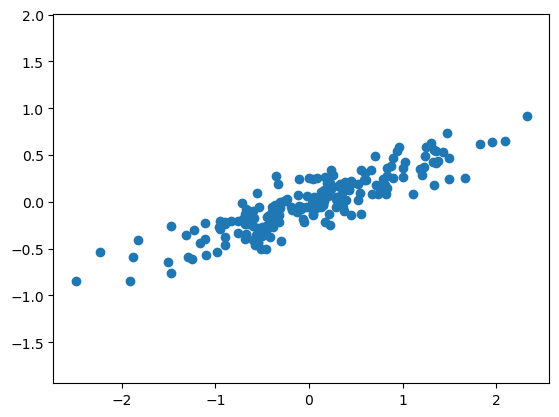

In [67]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)

X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [69]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [70]:
pca.explained_variance_

array([0.7625315, 0.0184779])

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

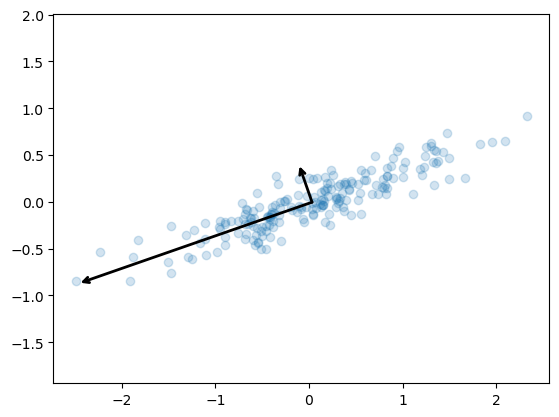

In [71]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                      linewidth = 2,
                      shrinkA = 0,
                      shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)
    
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [72]:
pca.mean_

array([ 0.03351168, -0.00408072])

In [73]:
pca.mean_ + v

array([-0.10050192,  0.38107044])

In [74]:
X.shape

(200, 2)

In [75]:
n = 200

In [76]:
print(pca)

PCA(n_components=2)


In [77]:
v = vector * 3 * np.sqrt(length)

In [78]:
vector

array([-0.32862557,  0.94446029])

In [79]:
length

0.018477895513562572

In [80]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [81]:
pca.explained_variance_

array([0.7625315, 0.0184779])

## Creating Methods to Compute PCA

In [82]:
from sklearn.preprocessing import StandardScaler

def standarize_features(X):
    
    scaler = StandardScaler()
    scaler.fit(X)
    
    return scaler.transform(X)
    

In [83]:
simX = X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
simX[0]

array([-1.69799022, -1.21402271])

In [84]:
Xscaled = standarize_features(simX)

Solve Av - lambdav = 0 
which is equal to solving v(A-lambdaI) = 0 ; or det(X-\lambdaI) = 0

In [85]:
def get_eigens(X):
    """ X is the covariance matrix"""
    return np.linalg.eigh(X)

def calculate_covariance(X):
    return np.cov(X)

In [86]:
Cov = calculate_covariance(Xscaled.T)
eigVal, eigVec = get_eigens(Cov)


In [87]:
eigVal

array([0.07372349, 1.93632676])

In [88]:
eigVec

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [89]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigVal)[::-1]
 
sorted_eigenvalue = eigVal[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigVec[:,sorted_index]

In [90]:
# select and transform number of eigen

n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    
    

In [91]:
X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()

In [92]:
X_reduced[0]

array([-2.05910409,  0.34221671])

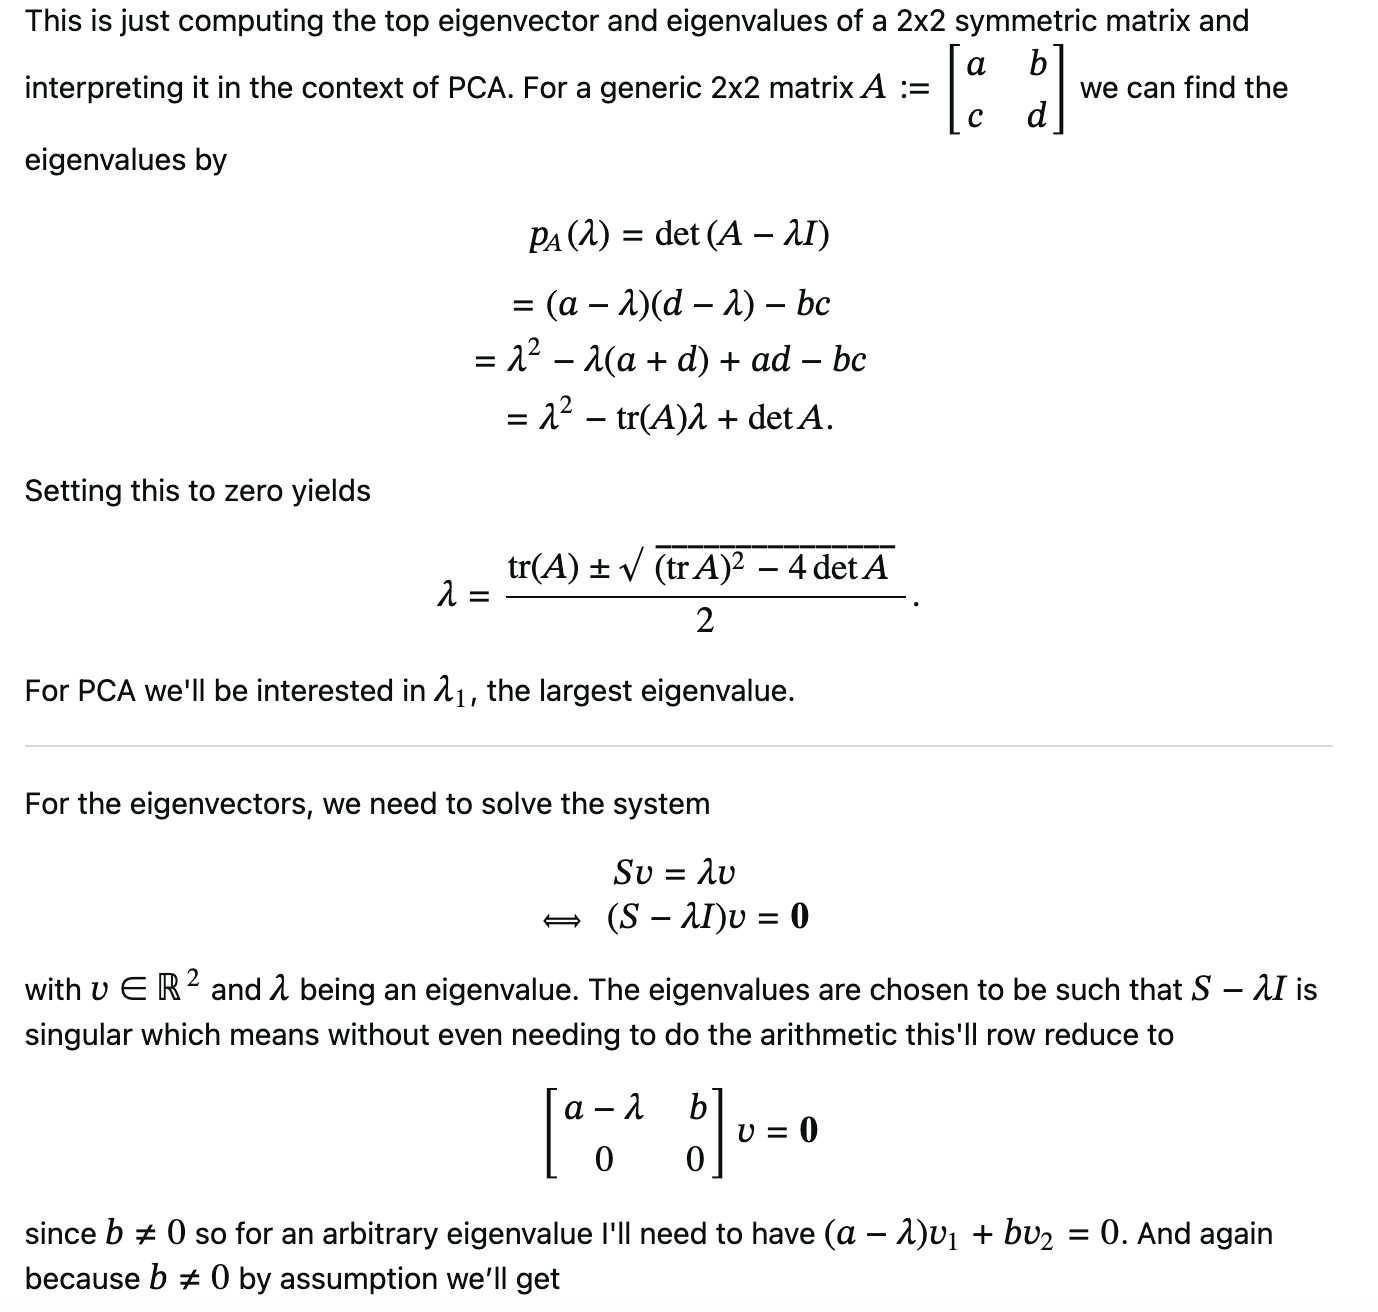

## Incremental PCA

Used when data is really large and uses a batch process to analyze the data, saving only approximations of the data.

In [94]:
from sklearn.decomposition import PCA, IncrementalPCA

IncrementalPCA.partial_fit(X, batch_size = 10)

TypeError: vars() argument must have __dict__ attribute

## SPARCE PCA

## KERNEL PCA